<div class='notice--success' markdown="1">

## <i class="fa fa-ship" aria-hidden="true"></i> Fundamentals of Raster Data in Python 

In this lesson, you will learn fundamental concepts related to working with raster data in **Python**, including understanding the spatial attributes of raster data, how to open raster data and access its metadata, and how to explore the distribution of values in a raster dataset. 


## <i class="fa fa-graduation-cap" aria-hidden="true"></i> Learning Objectives

After completing this lesson, you will be able to:

* Open raster data using **Python**.
* Be able to list and identify 3 spatial attributes of a raster dataset: extent, crs and resolution.

</div>

The <a href="https://www.earthdatascience.org/courses/use-data-open-source-python/data-stories/lidar-raster-data/lidar-intro/" target="_blank">data story on Lidar data</a> reviews the basic principles behind Lidar raster datasets.

In this lesson, you will learn how to open and plot a lidar raster dataset in **Python**. You will also learn about key attributes of a raster dataset:

1. Spatial resolution
2. Spatial extent and
3. Coordinate reference systems


## What is a Raster?

Raster or “gridded” data are stored as a grid of values which are rendered on a map as pixels. Each pixel value represents an area on the Earth’s surface. A raster file is composed of regular grid of cells, all of which are the same size. 

You've looked at and used rasters before if you've looked at photographs or imagery in a tool like Google Earth. However, the raster files that you will work with are different from photographs in that they are spatially referenced. Each pixel represents an area of land on the ground. That area is defined by the spatial **resolution** of the raster.

<figure>
   <a href="https://www.earthdatascience.org/images/earth-analytics/raster-data/raster-concept.png" target="_blank">
   <img src="https://www.earthdatascience.org/images/earth-analytics/raster-data/raster-concept.png" alt="Raster data concept diagram."></a>
   <figcaption>A raster is composed of a regular grid of cells. Each cell is the same
   size in the x and y direction. Source: Colin Williams, NEON.
   </figcaption>
</figure>


### Raster Facts

A few notes about rasters:

-  Each cell is called a pixel.
-  And each pixel represents an area on the ground.
-  The resolution of the raster represents the area that each pixel represents on the ground. So, a 1 meter resolution raster, means that each pixel represents a 1 m by 1 m area on the ground.

A raster dataset can have attributes associated with it as well. For instance in a Lidar derived digital elevation model (DEM), each cell represents an elevation value for that location on the earth. In a LIDAR derived intensity image, each cell represents a Lidar intensity value or the amount of light energy returned to and recorded by the sensor.


<figure>
   <a href="https://www.earthdatascience.org/images/earth-analytics/raster-data/raster-resolution.png" target="_blank">
   <img src="https://www.earthdatascience.org/images/earth-analytics/raster-data/raster-resolution.png" alt="Raster data resolution concept diagram."></a>
   <figcaption>Rasters can be stored at different resolutions. The resolution simply
   represents the size of each pixel cell. Source: Colin Williams, NEON.
   </figcaption>
</figure>

## Open Raster Data in Python

You can use the **rasterio** library combined with **numpy** and **matplotlib** to open, manipulate and plot raster data in **Python**.

In [1]:
# Import necessary packages
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from shapely.geometry import Polygon, box
import geopandas as gpd
import rasterio as rio
from rasterio.plot import show
from rasterio.mask import mask

# Package created for the earth analytics program
import earthpy as et
import earthpy.plot as ep

# Prettier plotting with seaborn
sns.set(font_scale=1.5, style="white")

In [2]:
# Get data and set working directory
et.data.get_data("colorado-flood")
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

Note that you imported the **rasterio** library using the shortname `rio`.

Now, you can use the `rio.open("path-to-raster-here")` function to open a raster dataset.

In [3]:
# Define relative path to file
lidar_dem_path = os.path.join("data", "colorado-flood", "spatial", 
                              "boulder-leehill-rd", "pre-flood", "lidar",
                              "pre_DTM.tif")
# Open raster data
lidar_dem = rio.open(lidar_dem_path)

To check your data, you can query the spatial extent of the data using the attribute `.bounds`. 

You can also quickly plot the raster using the **rasterio** function called `show()`. The function argument `title = "Plot title here"` adds a title to the plot.

In [4]:
# Query the spatial extent of the data
lidar_dem.bounds

BoundingBox(left=472000.0, bottom=4434000.0, right=476000.0, top=4436000.0)

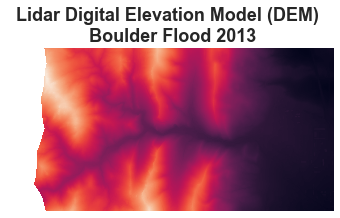

In [5]:
# Plot the dem using raster.io
fig, ax = plt.subplots(figsize = (8,3))

show(lidar_dem, 
     title="Lidar Digital Elevation Model (DEM) \n Boulder Flood 2013", 
     ax=ax)

ax.set_axis_off()

### Opening and Closing File Connections

The rasterio library is efficient as it establishes a connection with the 
raster file rather than directly reading it into memory. Because it creates a 
connection, it is important that you close the connection after it is opened
AND after you've finished working with the data!


In [6]:
# Close the connection
lidar_dem.close()

```
# this returns an error as you have closed the connection to the file. 
show(lidar_dem)
```

```
---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
<ipython-input-7-dad244dfd7d3> in <module>()
      1 # this returns an error as you have closed the connection to the file.
----> 2 show(lidar_dem)

~/anaconda3/envs/earth-analytics-python/lib/python3.6/site-packages/rasterio/plot.py in show(source, with_bounds, contour, contour_label_kws, ax, title, **kwargs)
     80     elif isinstance(source, RasterReader):
     81         if source.count == 1:
---> 82             arr = source.read(1, masked=True)
     83         else:
     84             try:

rasterio/_io.pyx in rasterio._io.RasterReader.read (rasterio/_io.c:10647)()

rasterio/_io.pyx in rasterio._io.RasterReader._read (rasterio/_io.c:15124)()

ValueError: can't read closed raster file

```

Once the connection is closed, you can no longer work with the data. You'll need 
to re-open the connection. Like this:

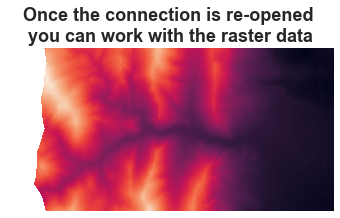

In [7]:
# Open raster data connection - again
lidar_dem = rio.open(lidar_dem_path)

fig, ax = plt.subplots(figsize = (8,3))

show(lidar_dem, 
     title="Once the connection is re-opened \nyou can work with the raster data", 
     ax=ax)

ax.set_axis_off()

In [8]:
lidar_dem.close()

## Context Manager to Open/Close Raster Data

A better way to work with raster data in **rasterio** is to use the context manager. This will handle opening and closing the raster file for you. 

`with rio.open(path-to-file') as src:
    src.rasteriofunctionname`


In [9]:
with rio.open(lidar_dem_path) as src:
    print(src.bounds)

BoundingBox(left=472000.0, bottom=4434000.0, right=476000.0, top=4436000.0)


With a context manager, you create a connection to the file that you'd like to open. 
However, once your are outside of the `with` statement, that connection closes. Thus
you don't have to worry about opening and closing files using this syntax.

In [10]:
# Note that the src object is now closed
src

<closed DatasetReader name='data/colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif' mode='r'>

## Raster Plots with Matplotlib

Above you used the `show()` function to plot a rasterio object. Show "wraps" around the **matplotlib** plotting library to produce a plot. 

However, you will explore plotting a numpy array with **matplotlib** directly. Using **matplotlib** allows you to fully customize your plots. Alongside **matplotlib**, you will also be exploring using another "wrapper" function to aide in the plotting, `earthpy.plot`.

To plot using **matplotlib** and **earthpy** directly you:

1. open the raster
2. `create a spatial_extent` object that contains the boundary information needed to plot your raster in space using `rio.plot.plotting_extent`
3. Read in the raster data itself into a numpy array using `.read()`


<!-- How carson gets the bounds element # Get the bounds of the raster (for plotting later)
#bounds = lidar_dem.bounds[::2] + lidar_dem.bounds[1::2]
#bounds -->

In [11]:
with rio.open(lidar_dem_path) as src:
    
    # Convert / read the data into a numpy array:
    lidar_dem_im = src.read()
    
    # Create a spatial extent object using rio.plot.plotting
    spatial_extent = rio.plot.plotting_extent(src)
    
    # Get bounds of object
    bounds = src.bounds

You can use the `rio.plot.plotting_extent` function to create a spatial extent in the format 
that **matplotlib** needs to plot your raster. 

### Spatial Extents and Plotting 

The bounding box output - which represents the spatial extent of your raster, is 
provided to use in a **rasterio** specific format. To plot with **matplotlib**, you need to 
provide a vector that contains the spatial extent in the following format:

`[left, right, bottom, top]`

However, if you just use the `.bounds` object that rasterio provides, the numbers are not in the correct order. You can use `rio.plot.plotting_extent(rasterio-object-name-here)` function to get a spatial extent in the format that matplotlib requires

In [12]:
# This is the format that matplotlib wants
print("spatial extent:", spatial_extent)

# This is the format that rasterio provides with the bounds attribute
print("rasterio bounds:", bounds)

spatial extent: (472000.0, 476000.0, 4434000.0, 4436000.0)
rasterio bounds: BoundingBox(left=472000.0, bottom=4434000.0, right=476000.0, top=4436000.0)


In [13]:
# Reshape the bounds into a form that matplotlib wants
# spatial_extent = [src.bounds.left, src.bounds.right,
#                    src.bounds.bottom, src.bounds.top]
# spatial_extent